# German Credit Risk

## Acknowledgment
### Source: UCI


## Data Analysis & Preprocessing 

In [1]:
#importing relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('german data.csv') #reading csv file

In [3]:
df.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


The data is in this format, lets convert it to make it more readable

In [4]:
#assigning column names
df.columns = ["checkAccount","duration", "creditHistory", "purpose", "creditAmount","savings",
             "employedSince","installmentRate", "statusSex","otherDebtors","residenceSince",
             "property","age","otherInstallment","housing","existingCredits","job","liable",
              "telephone","foreign","class"]

In [5]:
df.columns

Index(['checkAccount', 'duration', 'creditHistory', 'purpose', 'creditAmount',
       'savings', 'employedSince', 'installmentRate', 'statusSex',
       'otherDebtors', 'residenceSince', 'property', 'age', 'otherInstallment',
       'housing', 'existingCredits', 'job', 'liable', 'telephone', 'foreign',
       'class'],
      dtype='object')

In [6]:
#mapping the data

df["checkAccount"] = df["checkAccount"].map({'A14':"0",'A11':"<0 DM", 'A12': "0 <= <200 DM",
                                                   'A13':">= 200 DM "})

df["creditHistory"] = df["creditHistory"].map({"A34":"critical account","A33":"delay in paying off",
                                                     "A32":"existing credits paid",
                                                     "A31":"all credits at this bank paid back duly",
                                                     "A30":"no credits taken"})

df["purpose"] = df["purpose"].map({ "A40": "car-new", "A41": "car-used", "A42": "furniture", "A43": "television",
                                       "A44": "domestic appliances", "A45": "repairs", "A46": "education", "A47": "vacation",
                                      "A48": "retraining", "A49": "business", "A410": "others"})

df["savings"] = df["savings"].map({"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM",
                                                     "A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"})


df["employedSince"] = df["employedSince"].map({'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 
                                               'A72':"<1 years",'A71':"unemployed"})

df['statusSex'] = df['statusSex'].map({"A93": "male", "A92": "female", "A91": "male", "A94": "male", "A95": "female"})

df['otherDebtors'] = df['otherDebtors'].map({'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"})


df['property'] = df['property'].map({'A121':"real estate", 'A122':"savings agreement/life insurance", 
                                         'A123':"car or other", 'A124':"unknown / no property"})

df['otherInstallment'] = df['otherInstallment'].map({'A143':"none", 'A142':"store", 'A141':"bank"})


df["housing"] = df["housing"].map({"A151" : "rent", "A152" : "own", "A153" : "for free"})


df["job"] = df["job"].map({'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 
                               'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"})

df["telephone"] = df["telephone"].map({'A192':"yes", 'A191':"none"})



df["foreign"] = df["foreign"].map({'A201':"yes", 'A202':"no"})

In [7]:
df.head()

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,...,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
0,0 <= <200 DM,48,existing credits paid,television,5951,<100 DM,1<= < 4 years,2,female,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
1,0,12,critical account,education,2096,<100 DM,4<= <7 years,2,male,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
2,<0 DM,42,existing credits paid,furniture,7882,<100 DM,4<= <7 years,2,male,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
3,<0 DM,24,delay in paying off,car-new,4870,<100 DM,1<= < 4 years,3,male,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2
4,0,36,existing credits paid,education,9055,no savings account,1<= < 4 years,2,male,none,...,unknown / no property,35,none,for free,1,unskilled - resident,2,yes,yes,1


Our data has 13 categorical values and 7 integer values, including one output value, which is of integer data type.

In [8]:
df.dtypes

checkAccount        object
duration             int64
creditHistory       object
purpose             object
creditAmount         int64
savings             object
employedSince       object
installmentRate      int64
statusSex           object
otherDebtors        object
residenceSince       int64
property            object
age                  int64
otherInstallment    object
housing             object
existingCredits      int64
job                 object
liable               int64
telephone           object
foreign             object
class                int64
dtype: object

In [9]:
df.dtypes.value_counts()

object    13
int64      8
dtype: int64

In [10]:
df.shape

(999, 21)

To detect outliers, we can look at the statistical information provided below:

In [11]:
df.describe()

,duration,creditAmount,installmentRate,residenceSince,age,existingCredits,liable,class
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155,1.300300
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [12]:
min_threshold, max_threshold=df.creditAmount.quantile([0.005,0.995])
min_threshold, max_threshold

(361.81, 14903.569999999992)

In [13]:
df[df.creditAmount>max_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,...,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
94,0 <= <200 DM,54,no credits taken,business,15945,<100 DM,<1 years,3,male,none,...,unknown / no property,58,none,rent,1,skilled employee / official,1,yes,yes,2
636,0,60,delay in paying off,television,15653,<100 DM,4<= <7 years,2,male,none,...,car or other,21,none,own,2,skilled employee / official,1,yes,yes,1
817,<0 DM,36,existing credits paid,others,15857,<100 DM,unemployed,2,male,co-applicant,...,car or other,43,none,own,1,management/ highly qualified employee,1,none,yes,1
886,0 <= <200 DM,48,existing credits paid,business,15672,<100 DM,1<= < 4 years,2,male,none,...,car or other,23,none,own,1,skilled employee / official,1,yes,yes,2
914,0 <= <200 DM,48,no credits taken,others,18424,<100 DM,1<= < 4 years,1,female,none,...,savings agreement/life insurance,32,bank,own,1,management/ highly qualified employee,1,yes,no,2


In [14]:
df[df.creditAmount<min_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,...,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
156,<0 DM,12,all credits at this bank paid back duly,retraining,339,<100 DM,>=7 years,4,male,none,...,car or other,45,bank,own,1,unskilled - resident,1,none,yes,1
176,<0 DM,6,critical account,television,338,500 <= < 1000 DM,>=7 years,4,male,none,...,car or other,52,none,own,2,skilled employee / official,1,none,yes,1
308,0 <= <200 DM,9,existing credits paid,car-new,276,<100 DM,1<= < 4 years,4,male,none,...,real estate,22,none,rent,1,unskilled - resident,1,none,yes,1
457,<0 DM,6,existing credits paid,domestic appliances,343,<100 DM,<1 years,4,female,none,...,real estate,27,none,own,1,skilled employee / official,1,none,yes,1
724,0,6,critical account,car-new,250,>= 1000 DM,1<= < 4 years,2,female,none,...,real estate,41,bank,own,2,unskilled - resident,1,none,yes,1


In [15]:
min_threshold, max_threshold=df.age.quantile([0.005,0.995])
min_threshold, max_threshold

(20.0, 74.0)

In [16]:
df[df.age>max_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,...,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
329,<0 DM,24,critical account,car-used,6615,<100 DM,unemployed,2,male,none,...,unknown / no property,75,none,for free,2,management/ highly qualified employee,1,yes,yes,1
535,<0 DM,6,existing credits paid,car-new,1374,no savings account,unemployed,4,female,none,...,savings agreement/life insurance,75,none,own,1,management/ highly qualified employee,1,yes,yes,1


In [17]:
min_threshold, max_threshold=df.creditAmount.quantile([0.005,0.995])
min_threshold, max_threshold

(361.81, 14903.569999999992)

In [18]:
df[df.creditAmount>max_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,...,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
94,0 <= <200 DM,54,no credits taken,business,15945,<100 DM,<1 years,3,male,none,...,unknown / no property,58,none,rent,1,skilled employee / official,1,yes,yes,2
636,0,60,delay in paying off,television,15653,<100 DM,4<= <7 years,2,male,none,...,car or other,21,none,own,2,skilled employee / official,1,yes,yes,1
817,<0 DM,36,existing credits paid,others,15857,<100 DM,unemployed,2,male,co-applicant,...,car or other,43,none,own,1,management/ highly qualified employee,1,none,yes,1
886,0 <= <200 DM,48,existing credits paid,business,15672,<100 DM,1<= < 4 years,2,male,none,...,car or other,23,none,own,1,skilled employee / official,1,yes,yes,2
914,0 <= <200 DM,48,no credits taken,others,18424,<100 DM,1<= < 4 years,1,female,none,...,savings agreement/life insurance,32,bank,own,1,management/ highly qualified employee,1,yes,no,2


<AxesSubplot:ylabel='creditAmount'>

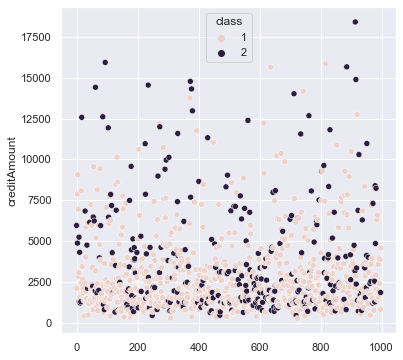

In [74]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.scatterplot(x=df.index, y=df.creditAmount, hue = df["class"])

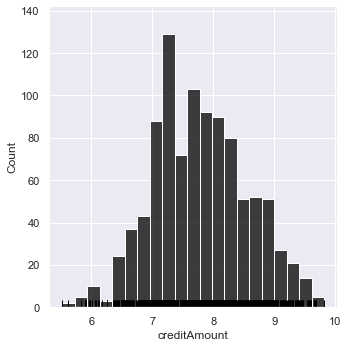

In [78]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.displot(x=np.log(df.creditAmount), color = 'black', rug=True)

<AxesSubplot:xlabel='creditAmount'>

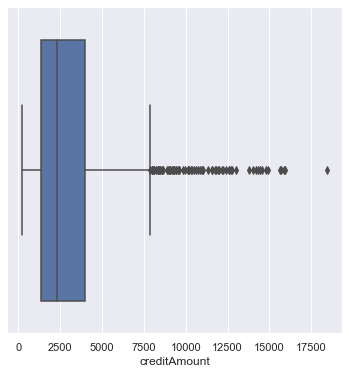

In [79]:
sns.boxplot(x=df.creditAmount)

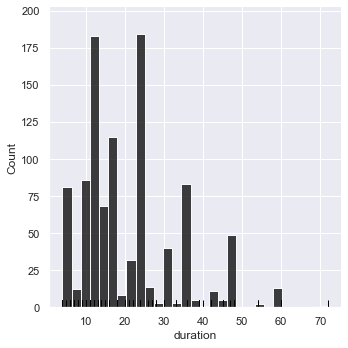

In [81]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.displot(x=df.duration, color = 'black', rug=True)

In [23]:
min_threshold, max_threshold=df.duration.quantile([0.005,0.995])
min_threshold, max_threshold

(4.0, 60.0)

In [24]:
df[df.duration<min_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,...,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class


In [25]:
df[df.duration>max_threshold]

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,...,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
676,0 <= <200 DM,72,existing credits paid,television,5595,100 <= <500 DM,1<= < 4 years,2,male,none,...,car or other,24,none,own,1,skilled employee / official,1,none,yes,2


<AxesSubplot:ylabel='duration'>

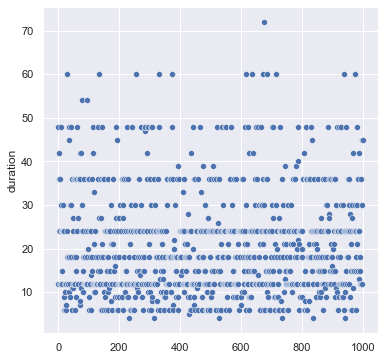

In [82]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.scatterplot(x=df.index, y=df.duration)

<AxesSubplot:xlabel='duration'>

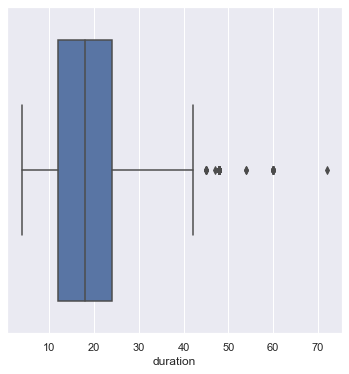

In [83]:
sns.boxplot(x=df.duration)

There is positive skewness in this column as well, since the right whisker of the boxplot is larger relatively. However, the point highlighted above isoutlier, hence we are going to remove thesefrom our dataset. We are not going to remove the rest of thepoints outside the boxplots, because these are the significant part of our dataset; due to high variance, removing them may lead to misclassification. 

Hence, removing the above points will give us the following normal distribution:

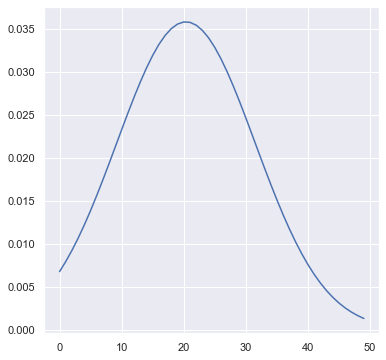

In [28]:
from scipy.stats import norm
rng = np.arange(df.duration[df.duration<60].max() - df.duration[df.duration<60].min())
plt.plot(rng, norm.pdf(rng, df.duration[df.duration<60].mean(), df.duration[df.duration<60].std()))

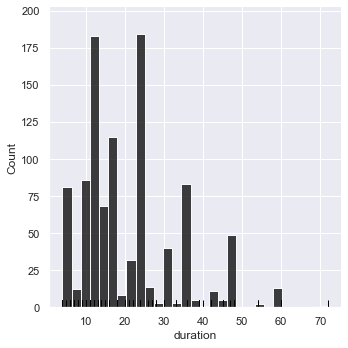

In [84]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.displot(x=df.duration, color = 'black', rug=True)

<AxesSubplot:xlabel='age'>

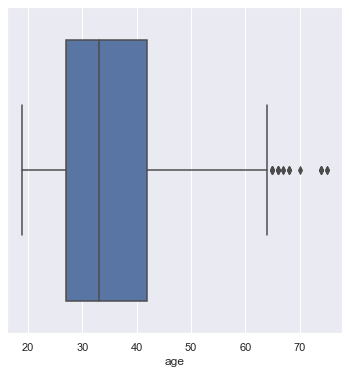

In [85]:
sns.boxplot(x=df.age)

In [31]:
df.installmentRate.value_counts().head()

4    475
2    231
3    157
1    136
Name: installmentRate, dtype: int64

<AxesSubplot:ylabel='installmentRate'>

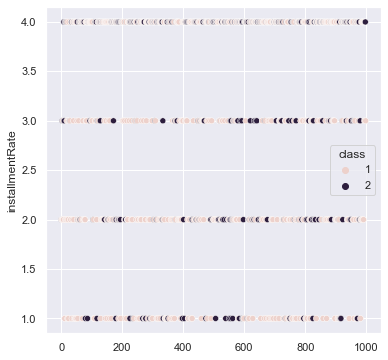

In [86]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.scatterplot(x=df.index, y=df.installmentRate, hue = df["class"])

In [33]:
#numerical variables labels
numvars = ['duration', 'creditAmount', 'installmentRate','residenceSince', 'age', 
           'existingCredits', 'liable']

In [34]:
df.liable.value_counts().head()

1    844
2    155
Name: liable, dtype: int64

In [35]:
# removing outliers from duration

df_new = df[df.duration<70]
df_new.shape

(998, 21)

In [36]:
 pd.options.mode.chained_assignment = None
df_new["creditAmount"] = np.log(df_new.creditAmount)
df_new["age"] = np.log(df_new.age)
df_new.head()

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,...,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign,class
0,0 <= <200 DM,48,existing credits paid,television,8.691315,<100 DM,1<= < 4 years,2,female,none,...,real estate,3.091042,none,own,1,skilled employee / official,1,none,yes,2
1,0,12,critical account,education,7.647786,<100 DM,4<= <7 years,2,male,none,...,real estate,3.891820,none,own,1,unskilled - resident,2,none,yes,1
2,<0 DM,42,existing credits paid,furniture,8.972337,<100 DM,4<= <7 years,2,male,guarantor,...,savings agreement/life insurance,3.806662,none,for free,1,skilled employee / official,2,none,yes,1
3,<0 DM,24,delay in paying off,car-new,8.490849,<100 DM,1<= < 4 years,3,male,none,...,unknown / no property,3.970292,none,for free,2,skilled employee / official,2,none,yes,2
4,0,36,existing credits paid,education,9.111072,no savings account,1<= < 4 years,2,male,none,...,unknown / no property,3.555348,none,for free,1,unskilled - resident,2,yes,yes,1


In [37]:
# extracting X and y

y=df_new['class']
X=df_new.drop(['class'], axis=1)

In [38]:
from sklearn.preprocessing import MinMaxScaler

X_stand = X.copy()
# apply standardization on numerical features
for i in numvars:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X[[i]])
    
    # transform the training data column
    X_stand[i] = scale.transform(X_stand[[i]])
X_stand.head()

,checkAccount,duration,creditHistory,purpose,creditAmount,savings,employedSince,installmentRate,statusSex,otherDebtors,residenceSince,property,age,otherInstallment,housing,existingCredits,job,liable,telephone,foreign
0,0 <= <200 DM,0.785714,existing credits paid,television,0.737184,<100 DM,1<= < 4 years,0.333333,female,none,0.333333,real estate,0.106772,none,own,0.000000,skilled employee / official,0.0,none,yes
1,0,0.142857,critical account,education,0.494500,<100 DM,4<= <7 years,0.333333,male,none,0.666667,real estate,0.689984,none,own,0.000000,unskilled - resident,1.0,none,yes
2,<0 DM,0.678571,existing credits paid,furniture,0.802539,<100 DM,4<= <7 years,0.333333,male,guarantor,1.000000,savings agreement/life insurance,0.627963,none,for free,0.000000,skilled employee / official,1.0,none,yes
3,<0 DM,0.357143,delay in paying off,car-new,0.690564,<100 DM,1<= < 4 years,0.666667,male,none,1.000000,unknown / no property,0.747135,none,for free,0.333333,skilled employee / official,1.0,none,yes
4,0,0.571429,existing credits paid,education,0.834803,no savings account,1<= < 4 years,0.333333,male,none,1.000000,unknown / no property,0.444929,none,for free,0.000000,unskilled - resident,1.0,yes,yes


<AxesSubplot:xlabel='job', ylabel='creditAmount'>

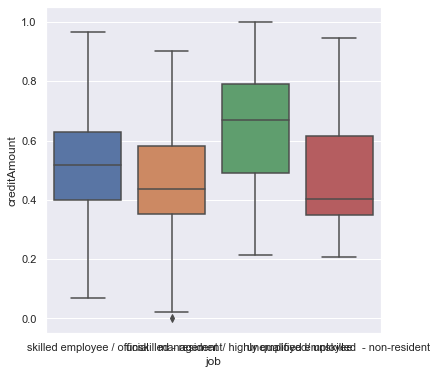

In [87]:
sns.boxplot(x= X_stand.job,y=X_stand.creditAmount)

In [40]:
#following categories are ordinal, hence different encoding method would be applied on them
ordinal = ["checkAccount", "creditHistory", "savings", "employedSince","otherDebtors","property",
        "otherInstallment","housing","job"]

#following attributes are nominal
nominal = ["statusSex","purpose","telephone", "foreign"]

In [41]:
#label encoding for ordinal data
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
le = X_stand[ordinal].apply(lambda x: d[x.name].fit_transform(x))

In [42]:
#one-hot encoding for nominal data
dummyvars = pd.get_dummies(X_stand[nominal])

In [43]:
#concatenate transformed data
clean_data = pd.concat([X_stand[numvars], le, dummyvars], axis = 1)
clean_data.head()

,duration,creditAmount,installmentRate,residenceSince,age,existingCredits,liable,checkAccount,creditHistory,savings,...,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television,telephone_none,telephone_yes,foreign_no,foreign_yes
0,0.785714,0.737184,0.333333,0.333333,0.106772,0.000000,0.0,1,3,2,...,0,0,0,0,0,1,1,0,0,1
1,0.142857,0.494500,0.333333,0.666667,0.689984,0.000000,1.0,0,1,2,...,1,0,0,0,0,0,1,0,0,1
2,0.678571,0.802539,0.333333,1.000000,0.627963,0.000000,1.0,2,3,2,...,0,1,0,0,0,0,1,0,0,1
3,0.357143,0.690564,0.666667,1.000000,0.747135,0.333333,1.0,2,2,2,...,0,0,0,0,0,0,1,0,0,1
4,0.571429,0.834803,0.333333,1.000000,0.444929,0.000000,1.0,0,3,4,...,1,0,0,0,0,0,0,1,0,1


In [44]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data,y,test_size=0.2, random_state=1)

In [45]:
X_train.shape

(798, 32)

In [46]:
y_train.value_counts().head()

1    558
2    240
Name: class, dtype: int64

## Applying Logistic Regression on the training data

In [68]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear', verbose=3, random_state=0, max_iter=10000).fit(X_train, y_train)

[LibLinear]

In [69]:
LR.score(X_test, y_test)

0.715

In [70]:
LR = LogisticRegression(max_iter=10000).fit(X_train, y_train)
LR.score(X_test, y_test)

0.72

## Applying ANN on the training data

Relu activation gave more accuracy

In [65]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=1, max_iter=10000).fit(X_train, y_train)

In [66]:
ann.score(X_test, y_test)

0.725

In [73]:
ann = MLPClassifier(random_state=1, max_iter=10000, 
                    activation = 'logistic', learning_rate='adaptive').fit(
                    X_train, y_train)
ann.score(X_test, y_test)

0.715